In [117]:
!pip install wordcloud


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

[nltk_data] Downloading package punkt to /home/assmin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [119]:
%matplotlib inline

# SMS spam or ham dataset. Dataset contains 5572 samples and five features:
### V1: labels (spam and ham)
### V2: text messages
### 3 Unnamed features.  
# Our tasks are to train and and perform predictions on the test data. Classifiers we use:
### LogisticRegression
### Navie-Bayes
### SVM 
### RandomForestClassifier

# Step 1: Preprocessing & Data Exploratory

### Feature selection
### Analyze feature statistics
### Visualization
### Remove stopwords
### TFIDF - Terms Frequency, Inverse Terms Frequency
### Decapitalization
### Tokenization
### Wordcloud

In [120]:
data=pd.read_csv("/home/assmin/Desktop/kaggle/spam.csv",encoding="cp1252")

In [121]:
df=pd.DataFrame(data)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [122]:
df=df.dropna(axis='columns')

In [123]:
df.rename(columns={"v1":"label","v2":"message"})

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [124]:
df['v2'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: v2, dtype: object

In [125]:
lengtext=[]
for i in df['v2']:
    lengtext.append(len(i))

In [126]:
df.loc[:,'length']=lengtext

/home/assmin/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/assmin/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [127]:
df

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [128]:
df.groupby('v1').describe()

length                                                         
       count        mean        std   min    25%    50%    75%    max
v1                                                                   
ham   4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam   747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

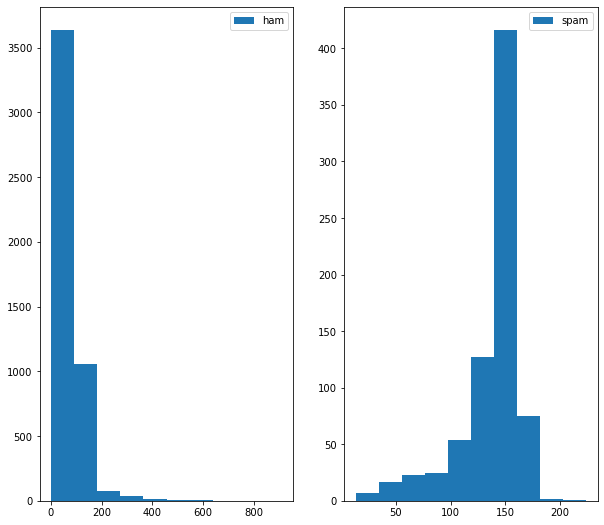

In [129]:
plt.figure(figsize=(10,20))
plt.subplot(2,2,1)
plt.hist(df.loc[df['v1']=='ham']['length'],label='ham')
plt.legend()

plt.subplot(2,2,2)
plt.hist(df.loc[df['v1']=='spam']['length'],label='spam')
plt.legend()

In [130]:
text_feat = df['v2'].copy()

In [131]:
text_feat

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [132]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/assmin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [133]:
def text_process(text):
    text=text.translate(str.maketrans('','',string.punctuation))
    text=[word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [134]:
text_feat=text_feat.apply(text_process)

In [135]:
vectorizer = TfidfVectorizer("english")

/home/assmin/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [136]:
text_feat

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U å£750 Pound prize...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: v2, Length: 5572, dtype: object

In [137]:
features = vectorizer.fit_transform(text_feat)#transform to matrix

In [138]:
features

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

In [139]:
df['v1']=np.where(df['v1']=='spam',1,0)
spam=[]
ham=[]
spam_class=df[df['v1']==1]['v2']
ham_class=df[df['v1']==0]['v2']

<ipython-input-139-d693e884b082>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1']=np.where(df['v1']=='spam',1,0)


In [140]:
def extract_ham(ham_class):
    global ham
    words=[word.lower() for word in word_tokenize(ham_class) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    ham+=words
    return ham

In [141]:
def extract_spam(spam_class):
    global spam
    words=[word.lower() for word in word_tokenize(spam_class) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    spam+=words
    return spam

In [142]:
spam_class.apply(extract_spam)


2       [free, entry, wkly, comp, win, fa, cup, final,...
5       [free, entry, wkly, comp, win, fa, cup, final,...
8       [free, entry, wkly, comp, win, fa, cup, final,...
9       [free, entry, wkly, comp, win, fa, cup, final,...
11      [free, entry, wkly, comp, win, fa, cup, final,...
                              ...                        
5537    [free, entry, wkly, comp, win, fa, cup, final,...
5540    [free, entry, wkly, comp, win, fa, cup, final,...
5547    [free, entry, wkly, comp, win, fa, cup, final,...
5566    [free, entry, wkly, comp, win, fa, cup, final,...
5567    [free, entry, wkly, comp, win, fa, cup, final,...
Name: v2, Length: 747, dtype: object

In [143]:
ham_class.apply(extract_ham)

0       [go, jurong, point, crazy, available, bugis, n...
1       [go, jurong, point, crazy, available, bugis, n...
3       [go, jurong, point, crazy, available, bugis, n...
4       [go, jurong, point, crazy, available, bugis, n...
6       [go, jurong, point, crazy, available, bugis, n...
                              ...                        
5565    [go, jurong, point, crazy, available, bugis, n...
5568    [go, jurong, point, crazy, available, bugis, n...
5569    [go, jurong, point, crazy, available, bugis, n...
5570    [go, jurong, point, crazy, available, bugis, n...
5571    [go, jurong, point, crazy, available, bugis, n...
Name: v2, Length: 4825, dtype: object

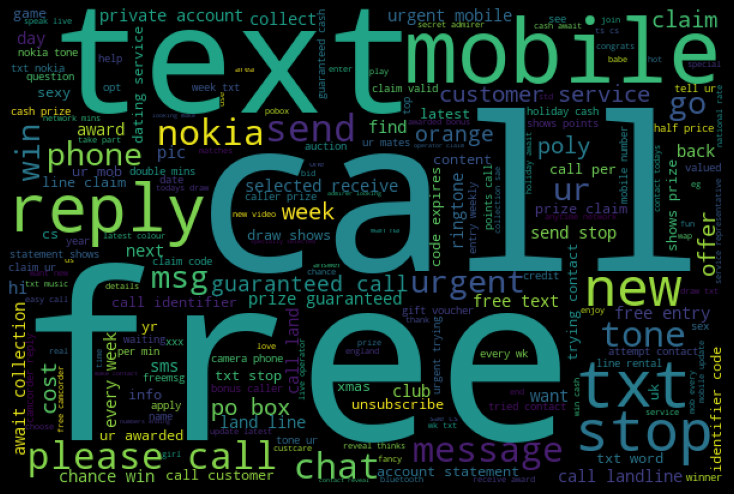

In [144]:
from wordcloud import WordCloud
spam_wordcloud=WordCloud(width=600,height=400).generate(" ".join(spam))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

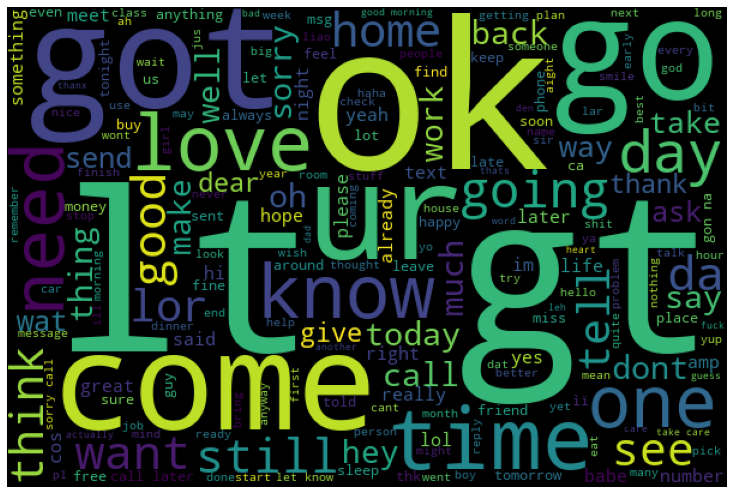

In [145]:
from wordcloud import WordCloud
spam_wordcloud=WordCloud(width=600,height=400).generate(" ".join(ham))
plt.figure(figsize=(10,8),facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [146]:
#top 10 spam word
spam_word=np.array(spam)
pd.Series(spam_word).value_counts().head(n=10)

call      346
free      219
txt       156
ur        144
u         144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [147]:
#top 10 ham word
ham_word=np.array(ham)
pd.Series(ham_word).value_counts().head(n=10)

u       989
gt      318
lt      316
get     301
ok      256
go      248
got     242
ur      237
know    236
like    231
dtype: int64

# Model implementation - Train - Perform Predictions

In [148]:
y=df['v1']
x=df['v2']


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [152]:
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)
x_train=cv.fit_transform(x_train)

In [153]:
x_train.shape

(4457, 7613)

In [154]:
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))

score_1=accuracy_score(y_test,pred_1)
score_1

0.9766816143497757

In [155]:
print(confusion_matrix(y_test,pred_1))

[[947   2]
 [ 24 142]]


In [156]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_2=nb.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)
score_2


0.9874439461883409

In [157]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)
score_3


0.9766816143497757

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf',RandomForestClassifier(n_estimators=100,n_jobs = -1))])

In [159]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'],data['v1'],test_size = 0.3, random_state =0,
                                                   shuffle = True, stratify = data['v1'])

In [160]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [161]:
y_pred = clf.predict(X_test)

In [162]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [163]:
clf.predict(["Hey what's good"])

array(['ham'], dtype=object)

In [164]:
table=pd.DataFrame([[0.9766816143497757,0.9874439461883409,0.9766816143497757,0.9748803827751196]],columns=list('ABCD'))

In [168]:
table=table.rename(columns={"A":"LogisticRegression","B":"Navie-Bayes","C":"SVM","D":"RandomForest"})


In [169]:
table.rename(index={0:"Accuracy"})

,LogisticRegression,Navie-Bayes,SVM,RandomForest
Accuracy,0.976682,0.987444,0.976682,0.97488


# In the conclusion, all of classifiers have over 97% of accuracy but Navie-Bayes algorithm scores the best performance with the highest of accuracy (98.7%).
### 